# DATA ANALYSIS OF BIRTH DATA OF DIFFERENT STATES AND THEIR COUNTIES.

In [1]:
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df=pd.read_csv("Births_data analysis.csv")

In [4]:
df.set_index("index")

,State,Month,Year,countyBirths,stateBirths,County
index,,,,,,
0,1,1,1985,36.0,5027,1001.0
1,1,2,1985,36.0,4627,1001.0
2,1,3,1985,43.0,4738,1001.0
3,1,4,1985,40.0,4626,1001.0
4,1,5,1985,34.0,4834,1001.0
...,...,...,...,...,...,...
321470,55,12,2015,111.0,5632,55131.0
321471,55,12,2015,307.0,5632,55133.0
321472,55,12,2015,154.0,5632,55139.0


In [5]:
df = df.dropna()

In [6]:
df = df.drop_duplicates()

In [7]:
z_scores = stats.zscore(df['stateBirths'] )
outliers = (z_scores > 3) | (z_scores < -3)

In [8]:
df = df[~outliers]

In [9]:
df.describe()

,index,State,Month,Year,countyBirths,stateBirths,County
count,274429.000000,274429.000000,274429.000000,274429.000000,274429.000000,274429.000000,274429.000000
mean,166951.486884,28.306779,6.483152,1995.927595,352.886699,9815.674393,30480.655299
std,94162.845591,14.394399,3.453961,10.147300,690.077362,7981.433215,14961.752049
min,0.000000,1.000000,1.000000,1985.000000,10.000000,417.000000,36.000000
25%,84527.000000,16.000000,3.000000,1987.000000,45.000000,4559.000000,18095.000000
50%,170752.000000,28.000000,6.000000,1992.000000,158.000000,7029.000000,31019.000000
75%,250095.000000,41.000000,9.000000,2005.000000,360.000000,12718.000000,42085.000000
max,321474.000000,56.000000,12.000000,2015.000000,14237.000000,41997.000000,56999.000000


In [10]:
z_scores = stats.zscore(df['countyBirths'] )
outliers = (z_scores > 3) | (z_scores < -3)

In [11]:
df = df[~outliers]

In [12]:
df.describe()

,index,State,Month,Year,countyBirths,stateBirths,County
count,269912.000000,269912.000000,269912.000000,269912.000000,269912.000000,269912.000000,269912.000000
mean,165840.237726,28.318256,6.482583,1995.804270,287.523871,9678.047738,30534.217438
std,94114.133915,14.368163,3.454091,10.123472,376.612664,7848.299816,14915.636171
min,0.000000,1.000000,1.000000,1985.000000,10.000000,417.000000,1001.000000
25%,83517.750000,16.000000,3.000000,1987.000000,43.000000,4521.000000,18097.000000
50%,169078.500000,28.000000,6.000000,1992.000000,155.000000,6969.000000,31041.000000
75%,248809.250000,41.000000,9.000000,2005.000000,341.000000,12623.000000,42085.000000
max,321474.000000,56.000000,12.000000,2015.000000,2423.000000,41997.000000,56999.000000


In [13]:
print(df[['countyBirths', 'stateBirths']].describe())

        countyBirths    stateBirths
count  269912.000000  269912.000000
mean      287.523871    9678.047738
std       376.612664    7848.299816
min        10.000000     417.000000
25%        43.000000    4521.000000
50%       155.000000    6969.000000
75%       341.000000   12623.000000
max      2423.000000   41997.000000


#BOXPLOT

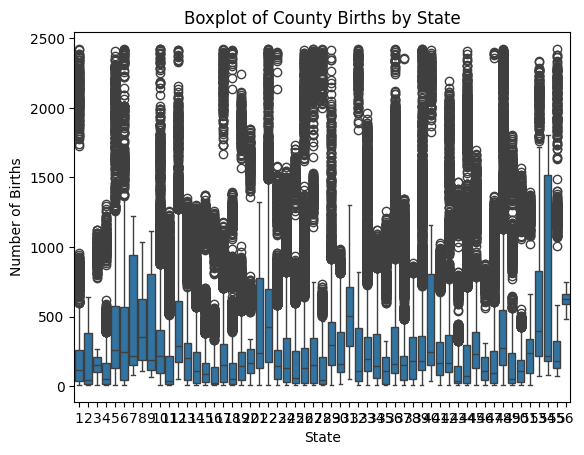

In [27]:
sns.boxplot(x='State', y='countyBirths', data=df)
plt.title('Boxplot of County Births by State')
plt.xlabel('State')
plt.ylabel('Number of Births')
plt.show()

#CORRELATION MATRIX

Correlation Matrix:
              countyBirths  stateBirths
countyBirths      1.000000     0.152513
stateBirths       0.152513     1.000000


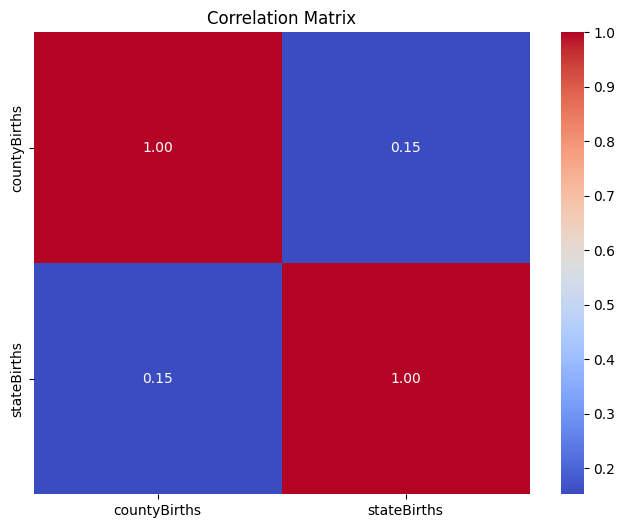

In [14]:
columns_for_correlation = ['countyBirths', 'stateBirths']
correlation_matrix = df[columns_for_correlation].corr()
print("Correlation Matrix:")
print(correlation_matrix)
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

#PAIRPLOT

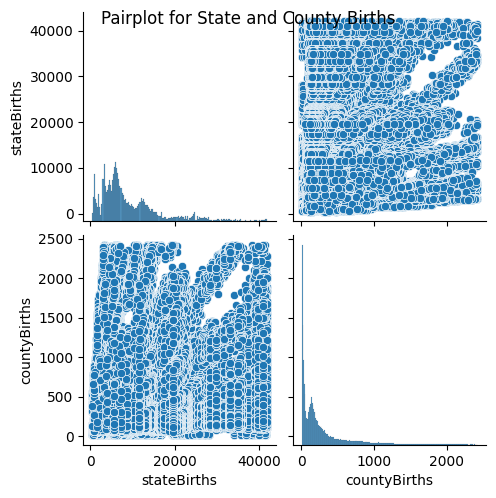

In [15]:
sns.pairplot(df[['stateBirths', 'countyBirths']])

plt.suptitle('Pairplot for State and County Births')
plt.show()

#SCATTER PLOT

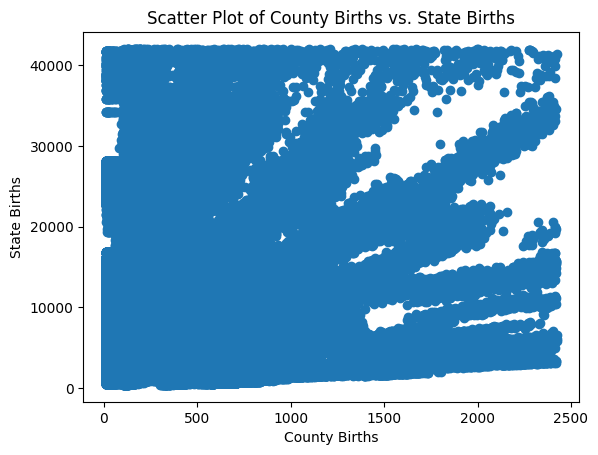

In [28]:
plt.scatter(df['countyBirths'], df['stateBirths'])
plt.title('Scatter Plot of County Births vs. State Births')
plt.xlabel('County Births')
plt.ylabel('State Births')
plt.show()

#HEAT MAP BETWEEN STATE BRTHS MONTHLY

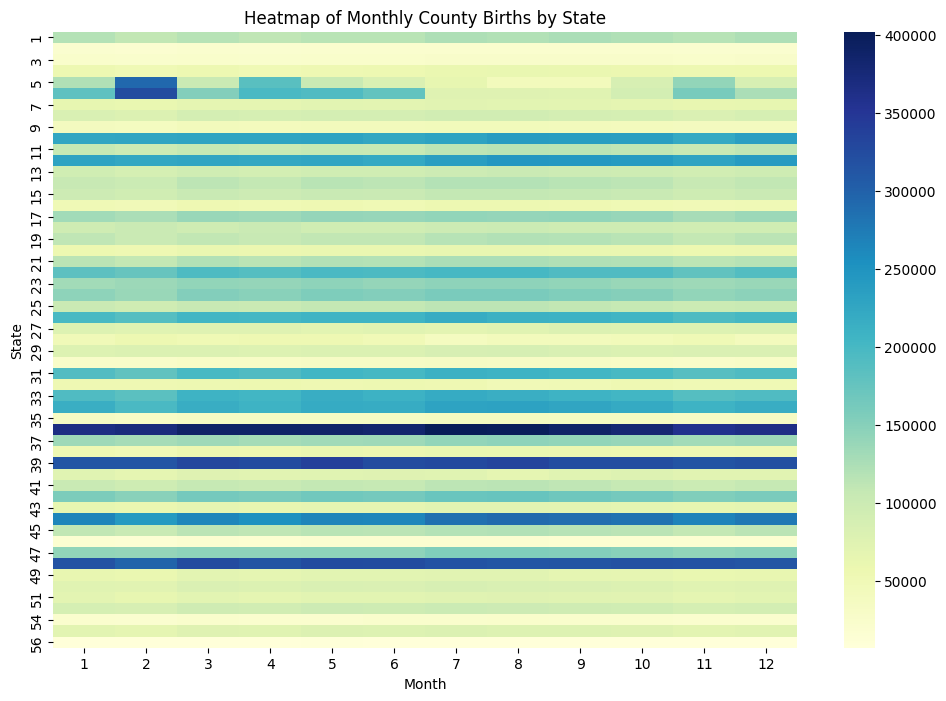

In [16]:
heatmap_data = df.pivot_table(values='countyBirths', index='State', columns='Month', aggfunc='sum')

# Plotting heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data, cmap='YlGnBu', annot=False, fmt=".1f")
plt.title('Heatmap of Monthly County Births by State')
plt.xlabel('Month')
plt.ylabel('State')
plt.show()

#TIME SERIES ANALYSIS WRT STATE AND COUNTY BIRTHS

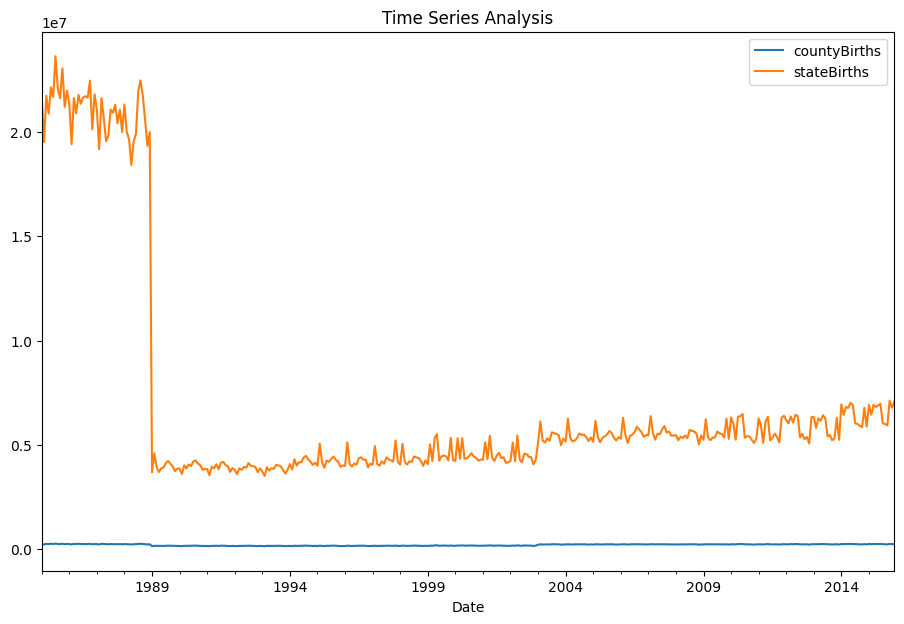

In [17]:
df['Date'] = pd.to_datetime(df[['Year', 'Month']].assign(DAY=1))
time_series_df = df.groupby('Date').agg({'countyBirths': 'sum', 'stateBirths': 'sum'})
time_series_df.plot(title='Time Series Analysis', figsize=(11, 7))
plt.show()

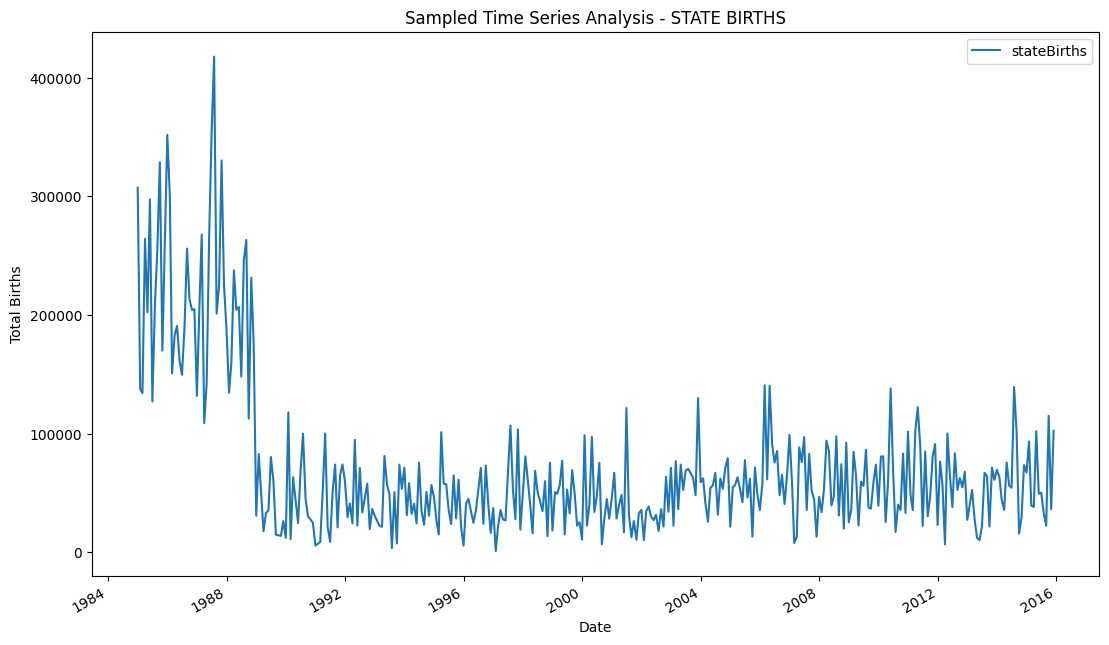

In [18]:
sampled_df = df.sample(frac=0.01)
sampled_df.groupby('Date').agg({'stateBirths': 'sum'}).plot(title='Sampled Time Series Analysis - STATE BIRTHS', figsize=(13, 8))
plt.xlabel('Date')
plt.ylabel('Total Births')
plt.show()

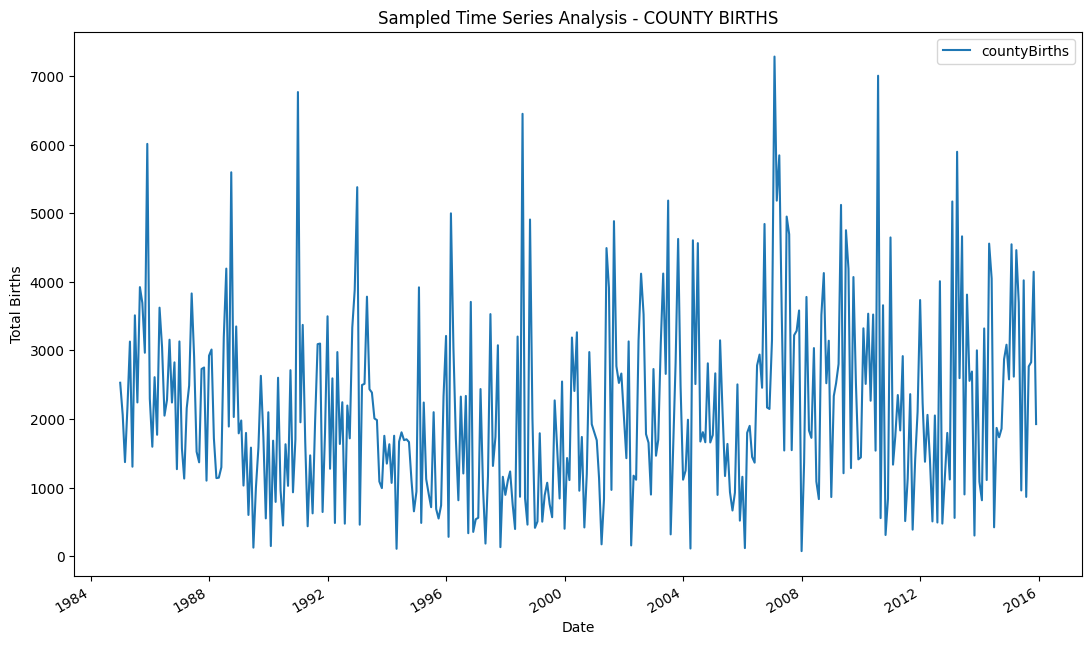

In [19]:
sampled_df = df.sample(frac=0.01)
sampled_df.groupby('Date').agg({'countyBirths': 'sum'}).plot(title='Sampled Time Series Analysis - COUNTY BIRTHS',figsize=(13, 8))
plt.xlabel('Date')
plt.ylabel('Total Births')
plt.show()

#HISTOGRAM COUNTY AND STATE BIRTHS

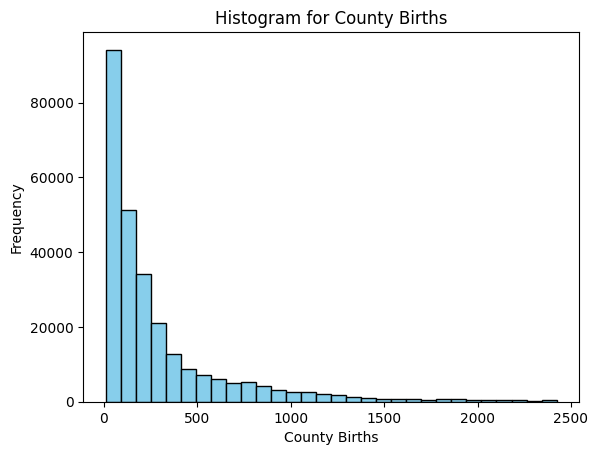

In [20]:
plt.hist(df['countyBirths'], bins=30, color='skyblue', edgecolor='black')
plt.title('Histogram for County Births')
plt.xlabel('County Births')
plt.ylabel('Frequency')
plt.show()

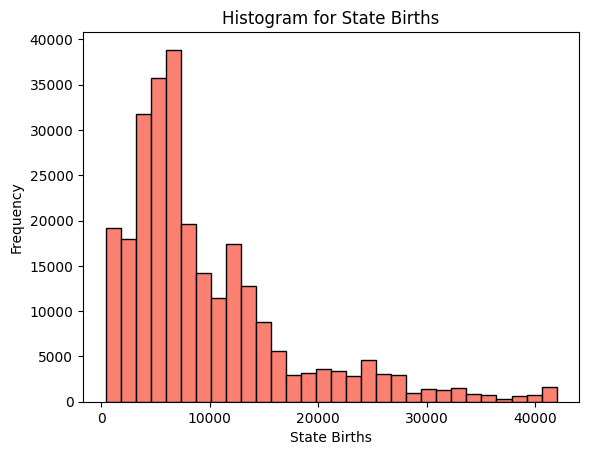

In [21]:
plt.hist(df['stateBirths'], bins=30, color='salmon', edgecolor='black')
plt.title('Histogram for State Births')
plt.xlabel('State Births')
plt.ylabel('Frequency')
plt.show()

# BAR GRAPHS

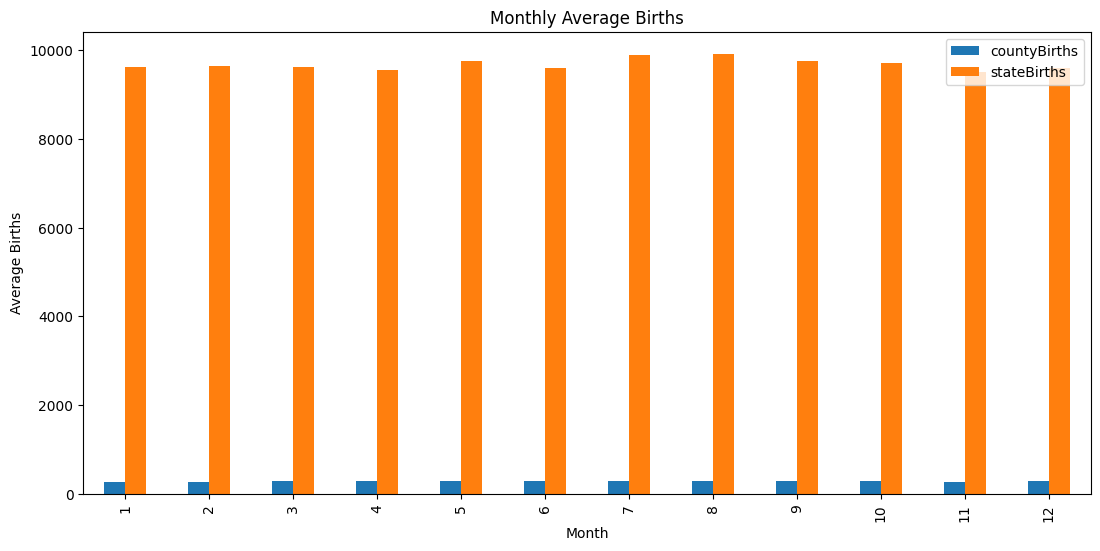

In [22]:

monthly_avg_births = df.groupby('Month')[['countyBirths', 'stateBirths']].mean()
monthly_avg_births.plot(kind='bar', title='Monthly Average Births',figsize=(13, 6))
plt.xlabel('Month')
plt.ylabel('Average Births')
plt.show()

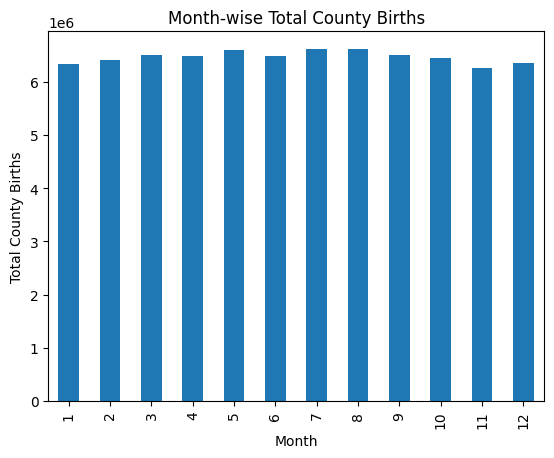

In [23]:
month_births_distribution = df.groupby('Month')['countyBirths'].sum()
month_births_distribution.plot(kind='bar', title='Month-wise Total County Births')
plt.xlabel('Month')
plt.ylabel('Total County Births')
plt.show()

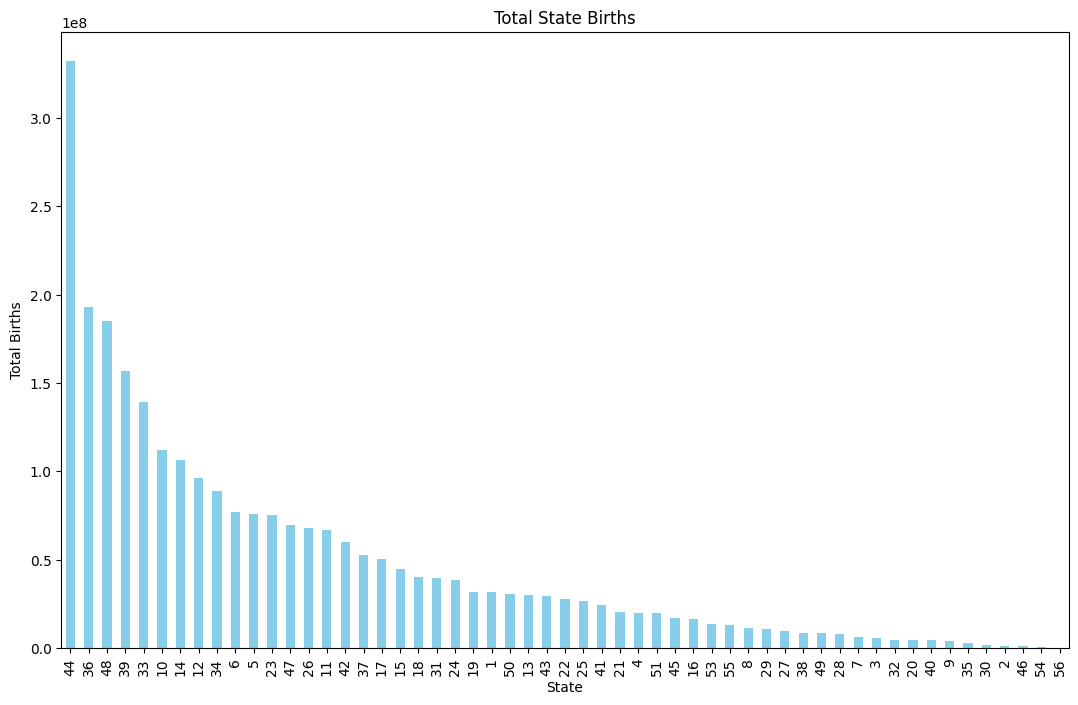

In [24]:
plt.figure(figsize=(13, 8))
state_total_births = df.groupby('State')['stateBirths'].sum().sort_values(ascending=False)
state_total_births.plot(kind='bar', color='skyblue')

plt.title('Total State Births')
plt.xlabel('State')
plt.ylabel('Total Births')
plt.show()

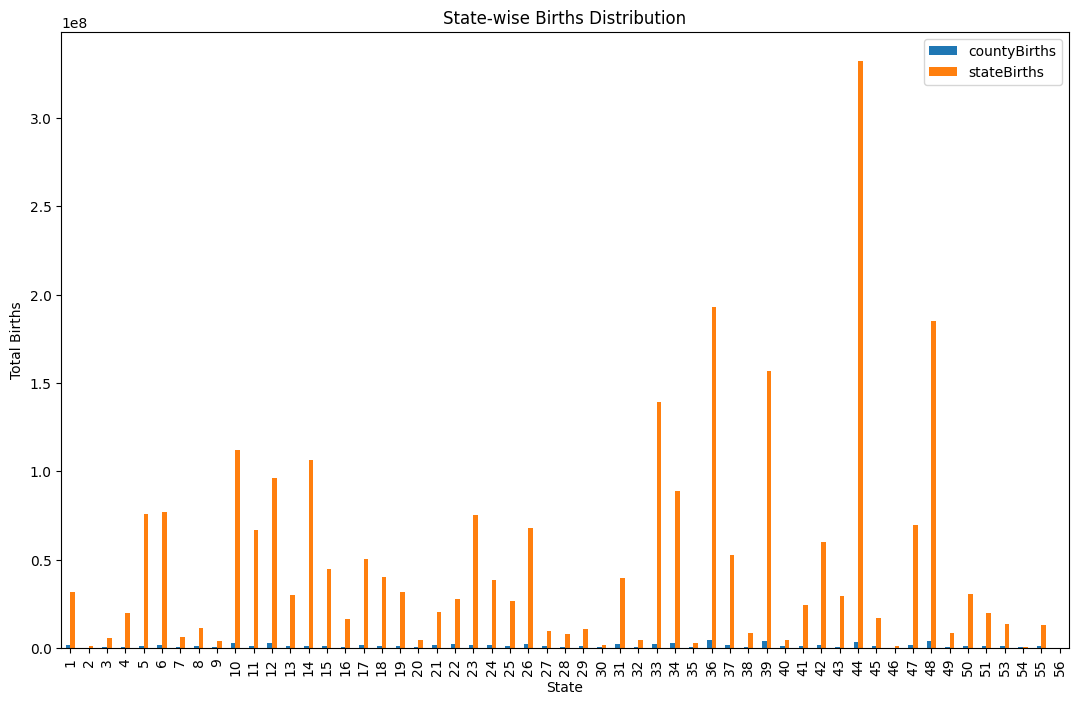

In [25]:

state_births_distribution = df.groupby('State')[['countyBirths', 'stateBirths']].sum()
state_births_distribution.plot(kind='bar', title='State-wise Births Distribution', figsize=(13, 8))
plt.xlabel('State')
plt.ylabel('Total Births')
plt.show()

In [26]:
correlation_matrix = df[['countyBirths', 'stateBirths']].corr()
print("Correlation Matrix:")
print(correlation_matrix)

Correlation Matrix:
              countyBirths  stateBirths
countyBirths      1.000000     0.152513
stateBirths       0.152513     1.000000
